### Importing the necessary packages, creating a Pandas DataFrame and gettting the overview of the data.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/seredjujk/Downloads/creditcard_frauds/frauds_data.csv')
df.head()

,transaction_date_and_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


### Getting to know the data

In [11]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_date_and_time  1333 non-null   object 
 1   merchant                   1333 non-null   object 
 2   category                   1333 non-null   object 
 3   amt                        1333 non-null   float64
 4   city                       1333 non-null   object 
 5   state                      1333 non-null   object 
 6   lat                        1333 non-null   float64
 7   long                       1333 non-null   float64
 8   city_pop                   1333 non-null   int64  
 9   job                        1333 non-null   object 
 10  dob                        1333 non-null   object 
 11  trans_num                  1333 non-null   object 
 12  merch_lat                  1333 non-null   float64
 13  merch_long                 1333 non-null   float

(1333, 15)

### Checking for any null values

In [12]:
df.isnull().sum()

transaction_date_and_time    0
merchant                     0
category                     0
amt                          0
city                         0
state                        0
lat                          0
long                         0
city_pop                     0
job                          0
dob                          0
trans_num                    0
merch_lat                    0
merch_long                   0
is_fraud                     0
dtype: int64

### Making the DataFrame more user-friendly

In [13]:
df.rename(columns={'transaction_date_and_time':'Transaction_time'}, inplace=True)
df.rename(columns={'merchant':'Merchant'}, inplace=True)
df.rename(columns={'category':'Category'}, inplace=True)
df.rename(columns={'amt':'Amount'}, inplace=True)
df.rename(columns={'city':'City'}, inplace=True)
df.rename(columns={'state':'State'}, inplace=True)
df.rename(columns={'lat':'Latitude'}, inplace=True)
df.rename(columns={'long':'Longitude'}, inplace=True)
df.rename(columns={'city_pop':'City_population'}, inplace=True)
df.rename(columns={'job':'Job'}, inplace=True)
df.rename(columns={'dob':'Date_of_birth'}, inplace=True)
df.rename(columns={'trans_num':'Transaction_number'}, inplace=True)
df.rename(columns={'merch_lat':'Merchant_latitude'}, inplace=True)
df.rename(columns={'merch_long':'Merchant_longitude'}, inplace=True)
df.rename(columns={'is_fraud':'Is_it_fraud'}, inplace=True)

df['Is_it_fraud'] = df['Is_it_fraud'].astype('bool')
df['Transaction_time'] = pd.to_datetime(df['Transaction_time'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_time    1333 non-null   datetime64[ns]
 1   Merchant            1333 non-null   object        
 2   Category            1333 non-null   object        
 3   Amount              1333 non-null   float64       
 4   City                1333 non-null   object        
 5   State               1333 non-null   object        
 6   Latitude            1333 non-null   float64       
 7   Longitude           1333 non-null   float64       
 8   City_population     1333 non-null   int64         
 9   Job                 1333 non-null   object        
 10  Date_of_birth       1333 non-null   object        
 11  Transaction_number  1333 non-null   object        
 12  Merchant_latitude   1333 non-null   float64       
 13  Merchant_longitude  1333 non-null   float64     

,Transaction_time,Merchant,Category,Amount,City,State,Latitude,Longitude,City_population,Job,Date_of_birth,Transaction_number,Merchant_latitude,Merchant_longitude,Is_it_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,False
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,False
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,False
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,False
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,False


### Spotting the fraud transactions

In [14]:
frauds = df[df['Is_it_fraud'] == True]
frauds

,Transaction_time,Merchant,Category,Amount,City,State,Latitude,Longitude,City_population,Job,Date_of_birth,Transaction_number,Merchant_latitude,Merchant_longitude,Is_it_fraud
945,2019-01-04 00:58:03,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,True
1077,2019-01-04 15:06:38,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,True
1184,2019-01-04 22:37:04,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,True
1192,2019-01-04 23:06:28,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,True
1202,2019-01-04 23:59:09,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,True
1236,2019-01-05 03:15:35,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,True
1239,2019-01-05 03:21:29,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,True
1322,2019-01-05 11:31:23,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,1954-07-14,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,True


In [15]:
frauds.groupby('City')['Amount'].sum()

City
Browning     367.29
Wales       1382.16
Name: Amount, dtype: float64

### As it is evident from the information above, in one of two unique frauds cases the credit card being used by a fraudster belongs to an 83-year-old person living in Wales, AK, whose profession is stated as 'Administrator, education', the amount of money being stolen is $1382.16 as a total of 7 transactions. In the other case the credit card belongs to an individual from Browning, MO, who is a 54-year-old cytogeneticist, and the amount stolen in this case is $367.29 in a single transaction.

### Finding the age groups of creditcard holders

Total number of creditcard holders: 1161
       age_group  number_of_holders  percentage
0  20_or_younger                  0         0.0
1       21_to_30                 64         5.5
2       31_to_40                296        25.5
3       41_to_50                335        28.9
4       51_to_60                167        14.4
5       61_to_70                129        11.1
6       71_to_80                 64         5.5
7    81_or_older                106         9.1


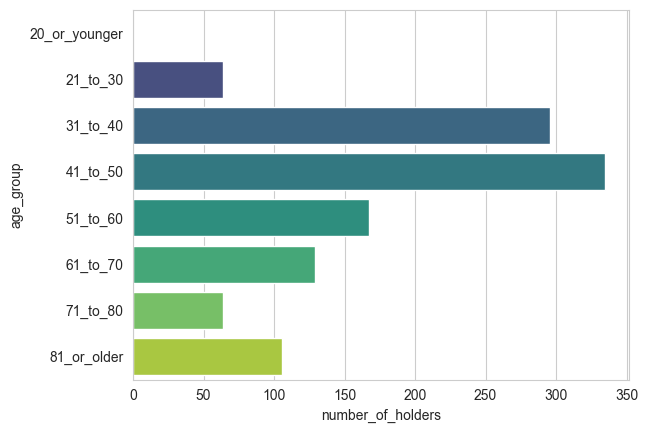

In [16]:
# Making age groups 
age_20_or_less = df[(df['Date_of_birth'] >= '2002')].value_counts().sum()
age_21_30 = df[(df['Date_of_birth'] <= '2001') & (df['Date_of_birth'] >= '1992')].value_counts().sum()
age_31_40 = df[(df['Date_of_birth'] <= '1991') & (df['Date_of_birth'] >= '1982')].value_counts().sum()
age_41_50 = df[(df['Date_of_birth'] <= '1981') & (df['Date_of_birth'] >= '1972')].value_counts().sum()
age_51_60 = df[(df['Date_of_birth'] <= '1971') & (df['Date_of_birth'] >= '1962')].value_counts().sum()
age_61_70 = df[(df['Date_of_birth'] <= '1961') & (df['Date_of_birth'] >= '1952')].value_counts().sum()
age_71_80 = df[(df['Date_of_birth'] <= '1951') & (df['Date_of_birth'] >= '1942')].value_counts().sum()
age_81_or_more = df[(df['Date_of_birth'] <= '1941')].value_counts().sum()

# Creating a new DataFrame
df_ages_dist = pd.DataFrame({'age_group':['20_or_younger', '21_to_30', '31_to_40', '41_to_50', '51_to_60', '61_to_70', '71_to_80', '81_or_older'],
                            'number_of_holders': [age_20_or_less, age_21_30, age_31_40, age_41_50, age_51_60, age_61_70, age_71_80, age_81_or_more]})

# Displaying the results in a tabular way
print('Total number of creditcard holders:', df_ages_dist['number_of_holders'].sum())
df_ages_dist['percentage'] = round(df_ages_dist['number_of_holders'] / df_ages_dist['number_of_holders'].sum() * 100, 1)
print(df_ages_dist)

# Plotting with Seaborn
sns.set_style('whitegrid')
sns.barplot(data=df_ages_dist, x='number_of_holders', y='age_group', palette='viridis')
plt.show()

### Finding how many cities are represented in the dataset

In [17]:
df.groupby('City')['City'].nunique().sum()

159